In [43]:
#Importing the required lib.
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [44]:
#Initializing the training and validation generators
train_path = 'DataSet/train'
val_path = 'DataSet/test'
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=(48,48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [45]:
#Building the convolution network architecture
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(7, activation='softmax'))

In [47]:
#Tarining the Model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'])
model_history = model.fit(
    train_generator,
    steps_per_epoch=28709 // 64,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=7178 // 64)

Epoch 1/10
448/448 [==============================] - 473s 1s/step - loss: 1.7874 - accuracy: 0.2679 - val_loss: 1.6866 - val_accuracy: 0.3521
Epoch 2/10
448/448 [==============================] - 438s 979ms/step - loss: 1.6168 - accuracy: 0.3749 - val_loss: 1.5205 - val_accuracy: 0.4234
Epoch 3/10
448/448 [==============================] - 450s 1s/step - loss: 1.5064 - accuracy: 0.4217 - val_loss: 1.4345 - val_accuracy: 0.4556
Epoch 4/10
448/448 [==============================] - 448s 999ms/step - loss: 1.4335 - accuracy: 0.4531 - val_loss: 1.3786 - val_accuracy: 0.4750
Epoch 5/10
448/448 [==============================] - 439s 979ms/step - loss: 1.3765 - accuracy: 0.4763 - val_loss: 1.3383 - val_accuracy: 0.4877
Epoch 6/10
448/448 [==============================] - 386s 860ms/step - loss: 1.3288 - accuracy: 0.4975 - val_loss: 1.2850 - val_accuracy: 0.5113
Epoch 7/10
448/448 [==============================] - 396s 884ms/step - loss: 1.2821 - accuracy: 0.5154 - val_loss: 1.2641 - val_a

In [51]:
# list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


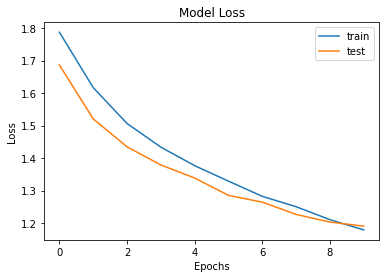

In [52]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','test'])
plt.show()

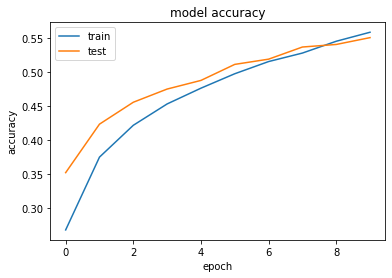

In [53]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [54]:
#Saving the Model Weight
model.save_weights('model.h5')